In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

/home/lucas/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/lucas/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


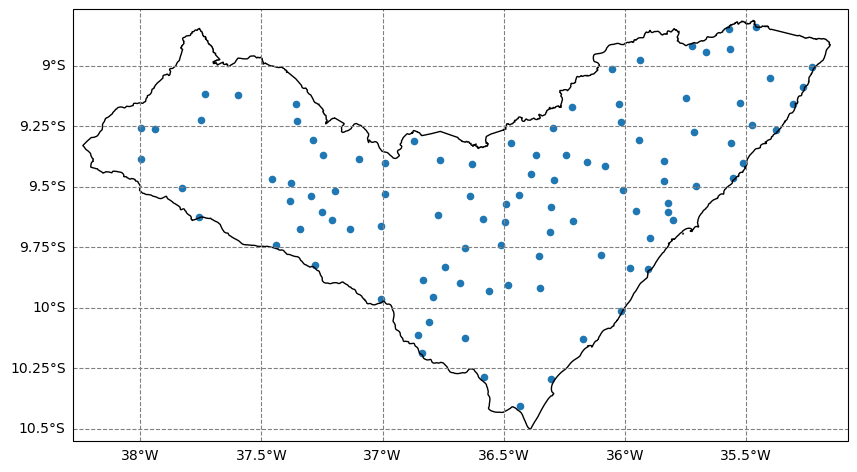

In [3]:
fig = plt.figure(figsize=(10, 8))
map = plt.axes(projection=ccrs.PlateCarree())
map.set_extent([-38.28, -35.08, -10.55, -8.768], ccrs.PlateCarree())
#map.add_feature(cfeature.BORDERS)
#map.add_feature(cfeature.COASTLINE)
#map.add_feature(cfeature.STATES)
#map.add_feature(cfeature.OCEAN)
#map.add_feature(cfeature.LAKES, alpha=1.0)
#map.add_feature(cfeature.LAND)

#Ler shp
shape_feature = ShapelyFeature(shpreader.Reader('AL_UF_2021/AL_UF_2021.shp').geometries(),\
 ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=1.0)
map.add_feature(shape_feature)

#Ler dados
df = pd.read_csv('AL_fab.csv', encoding='utf-8', sep=';', decimal=',')

#Plotar lat e lon
cs = map.scatter(df['LONGITUDE'].values, df['LATITUDE'].values,\
                 transform=ccrs.PlateCarree(), marker='o', s=20)

#Linhas da grade e Coordenadas geográficas
gd = map.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)
gd.ylabels_right = False
gd.xlabels_top = False

plt.savefig('Postos de estações.png', dpi=300, bbox_inches='tight')
plt.show()